<a href="https://colab.research.google.com/github/MikaZico36/DECDProject/blob/Carolina/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
numeroContratosContador_df = pd.read_csv('https://raw.githubusercontent.com/CarolinaSS98/project_decd/main/contadores-de-energia-atual.csv', sep =";", low_memory=False)
energiaConsumida_df = pd.read_csv('https://raw.githubusercontent.com/CarolinaSS98/project_decd/main/3-consumos-faturados-por-municipio-ultimos-10-anos.csv', sep =";")
numeroOrdensServico_df = pd.read_csv('https://raw.githubusercontent.com/CarolinaSS98/project_decd/main/15-ordens-de-servico.csv', sep =";")

# numeroContratosContador2023_df = numeroContratosContador_df[numeroContratosContador_df['Ano'] == 2023]
# energiaConsumida2023_df = energiaConsumida_df[energiaConsumida_df['Ano'] == 2023]
# numeroOrdensServico2023_df = numeroOrdensServico_df[numeroOrdensServico_df['Ano'] == 2023]


### Tratar Coleção - Número de Contratos Ativos por Tipo de Contador

#### Agregar dados por "data" e "Concelho"

Os números de CPE's foram separados em duas colunas:

- Número de CPEs=SIM : representa o número de CPE's ***com contadores inteligentes***.
- Número de CPEs=NAO : representa o número de CPE's ***sem contadores inteligentes***.

In [ ]:
# Filtrando os dados para separar os CPEs com e sem contador inteligente
df_sim = numeroContratosContador_df[numeroContratosContador_df['Inclui contador inteligente'] == 'SIM']
df_nao = numeroContratosContador_df[numeroContratosContador_df['Inclui contador inteligente'] == 'NÃO']

# Agrupando os dados por data e concelho e contando o número de CPEs para cada grupo
contadoresAgregados_df = pd.DataFrame({
    'Num_CPEs_Inteligentes': df_sim.groupby(['data','Concelho'])["Número de CPE's"].sum(),
    'Num_CPEs_Nao_Inteligentes': df_nao.groupby(['data','Concelho'])["Número de CPE's"].sum()
}).reset_index()

contadoresAgregados_df.rename(columns={'data': 'Data'}, inplace=True)

# Imprimindo o DataFrame resultante
contadoresAgregados_df.head(100)
# contadoresAgregados_df.info()

,Data,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes
0,2022-03,Abrantes,13331,11795
1,2022-03,Aguiar da Beira,2331,2587
2,2022-03,Alandroal,1977,2121
3,2022-03,Albergaria-a-Velha,5596,8525
4,2022-03,Albufeira,28711,24554
...,...,...,...,...
95,2022-03,Freixo de Espada À Cinta,1803,1730
96,2022-03,Fronteira,2057,469
97,2022-03,Fundão,17512,6518
98,2022-03,Gavião,1863,1664


### Tratar Coleção - Consumo de Energia Consumida

####Agregar dados por "data" e "Concelho"

O valor de  Energia Ativa (kWh) foi separado em duas colunas:
- **Energia_Ativa_Baixa_Tensao** : represneta o valor de energia consumida com nível de tensão baixo.
- **Energia_Ativa_Outra_Tensao** : represneta o valor de energia consumida com nível de tensão Média, Alta e Muito Alta Tensão

In [ ]:
# Filtrando os dados para separar a Energia Consumida por nível de tensão
df_baixa = energiaConsumida_df[energiaConsumida_df['Nível de Tensão'] == "Baixa Tensão"]
df_acimaBaixa = energiaConsumida_df[energiaConsumida_df['Nível de Tensão'] == "Muito Alta, Alta e Média Tensões"]

# Agrupando os dados por data e concelho e sumando o valor de energia consumida por cada um dos grupos
energiaAgregada_df = pd.DataFrame({
    'Energia_Consumida_Baixa_T': df_baixa.groupby(['Data','Concelho'])['Energia Ativa (kWh)'].sum(),
    'Energia_Consumida_Superior_Baixa_T': df_acimaBaixa.groupby(['Data','Concelho'])['Energia Ativa (kWh)'].sum()
}).reset_index()


# Imprimir infor do DataFrame agregado dos consumos
energiaAgregada_df.head()

,Data,Concelho,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T
0,2020-11,Abrantes,6.028607e+06,9.314171e+06
1,2020-11,Aguiar da Beira,1.065748e+06,2.623619e+05
2,2020-11,Alandroal,1.110645e+06,1.498483e+05
3,2020-11,Albergaria-a-Velha,4.153435e+06,1.144006e+07
4,2020-11,Albufeira,1.534018e+07,5.047671e+06


$\color{red}{\text{Este passo é para ser ignorado. A substituição dos valores a Null é feita no data set de teste aquando da sua criação mais abaixo }}$

#### Tratar valores Null Detetados

Dado terem sido detetados valores a NULL nas colunas de Energia Consumida de nível > Baixa Tensão, indica que existem concelhos onde não existe consumo deste nível de tensão.

A forma de tratar estes valores a null é colocá-los com o valor da mediana da coluna.

In [ ]:
#mostra quais sao as linhas onde aparecem valores de colunas a NaN
#linhas_valor_null = energiaAgregada_df[energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].isnull()]
#linhas_valor_null.head()


#linhas_not_null = energiaAgregada_df[energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].notna()]
#linhas_not_null.info()
#linhas_not_null.head()
#mediana_acimaBaixa = linhas_not_null['Energia_Consumida_Superior_Baixa_T'].median()
#print(mediana_acimaBaixa)
#energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].fillna(mediana_acimaBaixa, inplace=True)

#energiaAgregada_df.info()

# energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'] = energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].replace(np.nan, 0)

#energiaAgregada_df.info()

# linhas_valor_zero = energiaAgregada_df[energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'] == 0]

# linhas_valor_zero.head(100)

In [ ]:
energiaAgregada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Data                                11398 non-null  object 
 1   Concelho                            11398 non-null  object 
 2   Energia_Consumida_Baixa_T           11398 non-null  float64
 3   Energia_Consumida_Superior_Baixa_T  11314 non-null  float64
dtypes: float64(2), object(2)
memory usage: 356.3+ KB


### Tratar Coleção - Nº de Ordens de Serviço

####Agregar dados por "data" e "Concelho"

Não nos pareceu relevante agregar por concelho, contado o numero total de ordens de serviço por tipo e por isso vamos diretamente somar o número de ordens de serviço por concelho, ignorando a sua tipologia

In [ ]:
numeroOrdensServicoAgregado_df = pd.DataFrame({
    'Numero_total_ordens_servico': numeroOrdensServico_df.groupby(['data','Concelho'])['Ordens Serviço Realizadas (#)'].sum(),
}).reset_index()

numeroOrdensServicoAgregado_df.rename(columns={'data': 'Data'}, inplace=True)

numeroOrdensServicoAgregado_df.head(100)

numeroOrdensServicoAgregado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Data                         7227 non-null   object
 1   Concelho                     7227 non-null   object
 2   Numero_total_ordens_servico  7227 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 169.5+ KB


In [ ]:
merged_aux = pd.merge(contadoresAgregados_df,energiaAgregada_df, on=['Data','Concelho'], how='inner')
merged_df = pd.merge(merged_aux,numeroOrdensServicoAgregado_df, on=['Data','Concelho'], how='inner')

merged_df['Ano'] = merged_df.Data.str[:4]
merged_df['Mes'] = merged_df.Data.str[5:]
merged_df = merged_df.drop('Data', axis = 1)

merged_df.Concelho = merged_df.Concelho.astype('category')
merged_df.Mes = merged_df.Mes.astype('category')

In [ ]:
# mediana coluna Energia_Consumida_Superior_Baixa_T do conj treino (ano != 2024)
mediana = merged_df[merged_df.Ano != '2024'].Energia_Consumida_Superior_Baixa_T.median()

# imputar valores NA com mediana conj treino
merged_df['Energia_Consumida_Superior_Baixa_T'] = merged_df['Energia_Consumida_Superior_Baixa_T'].replace(np.nan, mediana)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Concelho                            6825 non-null   category
 1   Num_CPEs_Inteligentes               6825 non-null   int64   
 2   Num_CPEs_Nao_Inteligentes           6825 non-null   int64   
 3   Energia_Consumida_Baixa_T           6825 non-null   float64 
 4   Energia_Consumida_Superior_Baixa_T  6825 non-null   float64 
 5   Numero_total_ordens_servico         6825 non-null   int64   
 6   Ano                                 6825 non-null   object  
 7   Mes                                 6825 non-null   category
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 350.7+ KB


In [ ]:
min_value = merged_df['Numero_total_ordens_servico'].min()
print(min_value)

2


##Abordagem Supervisionada - Regressão

In [ ]:
# aplicar one hot enconding no mes
# nao o fazemos no concelho pq isso aumentaria radicalmente a dimensao

df_ohenc = pd.get_dummies(merged_df, columns = ['Mes'], dtype=int)

In [ ]:
train = df_ohenc[df_ohenc.Ano != '2024'].drop(['Ano','Mes_12'], axis = 1)
test = df_ohenc[df_ohenc.Ano == '2024'].drop(['Ano','Mes_12'], axis = 1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 0 to 6005
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Concelho                            6006 non-null   category
 1   Num_CPEs_Inteligentes               6006 non-null   int64   
 2   Num_CPEs_Nao_Inteligentes           6006 non-null   int64   
 3   Energia_Consumida_Baixa_T           6006 non-null   float64 
 4   Energia_Consumida_Superior_Baixa_T  6006 non-null   float64 
 5   Numero_total_ordens_servico         6006 non-null   int64   
 6   Mes_01                              6006 non-null   int64   
 7   Mes_02                              6006 non-null   int64   
 8   Mes_03                              6006 non-null   int64   
 9   Mes_04                              6006 non-null   int64   
 10  Mes_05                              6006 non-null   int64   
 11  Mes_06                             

In [ ]:
#drop concelho pra poder usar KNN

X_train = train.drop(['Numero_total_ordens_servico', 'Concelho'], axis=1)
X_test = test.drop(['Numero_total_ordens_servico', 'Concelho'], axis=1)

y_train = train.Numero_total_ordens_servico
y_test = test.Numero_total_ordens_servico

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 0 to 6005
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Num_CPEs_Inteligentes               6006 non-null   int64  
 1   Num_CPEs_Nao_Inteligentes           6006 non-null   int64  
 2   Energia_Consumida_Baixa_T           6006 non-null   float64
 3   Energia_Consumida_Superior_Baixa_T  6006 non-null   float64
 4   Mes_01                              6006 non-null   int64  
 5   Mes_02                              6006 non-null   int64  
 6   Mes_03                              6006 non-null   int64  
 7   Mes_04                              6006 non-null   int64  
 8   Mes_05                              6006 non-null   int64  
 9   Mes_06                              6006 non-null   int64  
 10  Mes_07                              6006 non-null   int64  
 11  Mes_08                              6006 non-nul

Normalização de Dados

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['Num_CPEs_Inteligentes', 'Num_CPEs_Nao_Inteligentes', 'Energia_Consumida_Baixa_T', 'Energia_Consumida_Superior_Baixa_T']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Regressão com o k-NN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k_range = range(1,15)
r2 = []
mse = []
mae = []
for k in k_range:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2.append(r2_score(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))

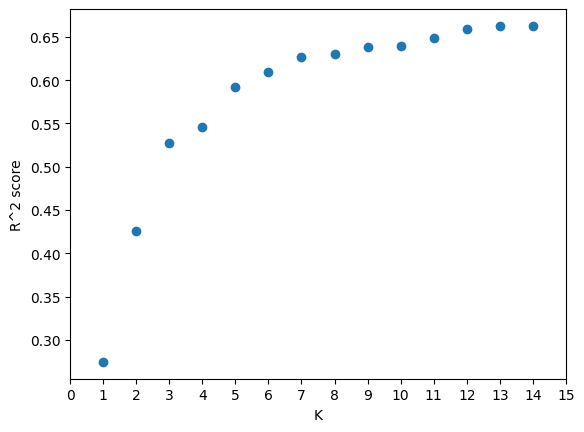

In [ ]:
plt.figure()
plt.xlabel('K')
plt.ylabel('R^2 score')
plt.scatter(k_range, r2)
plt.xticks([i for i in range(0,16)]);

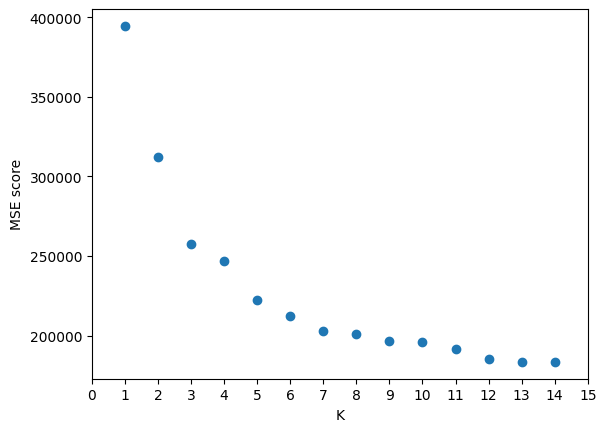

In [ ]:
plt.figure()
plt.xlabel('K')
plt.ylabel('MSE score')
plt.scatter(k_range, mse)
plt.xticks([i for i in range(0,16)]);

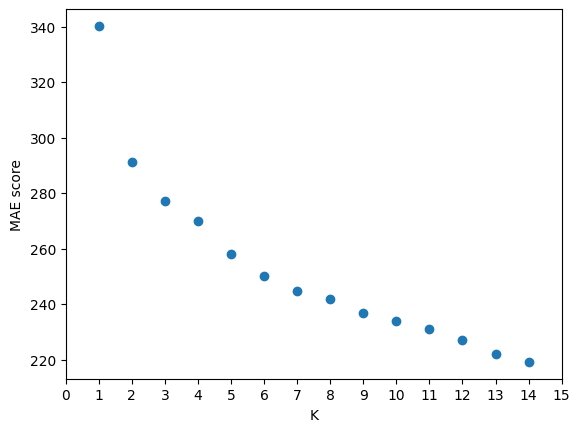

In [ ]:
plt.figure()
plt.xlabel('K')
plt.ylabel('MAE score')
plt.scatter(k_range, mae)
plt.xticks([i for i in range(0,16)]);

###Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
pred_lin_reg = reg.predict(X_test)

print(
    '\n r2:' + str(r2_score(y_test, pred_lin_reg)),
    '\n mse:' + str(mean_squared_error(y_test, pred_lin_reg)),
    '\n mae:' + str(mean_absolute_error(y_test, pred_lin_reg))
)


 r2:0.4347419649865246 
 mse:307380.2437982822 
 mae:387.03559986340423


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## creating instance
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

## getting best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
tree = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_leaf=4, min_samples_split=10)

tree.fit(X_train, y_train)

pred_tree_y = tree.predict(X_test)

In [ ]:
print(
    '\n r2:' + str(r2_score(y_test, pred_tree)),
    '\n mse:' + str(mean_squared_error(y_test, pred_tree)),
    '\n mae:' + str(mean_absolute_error(y_test, pred_tree))
)


 r2:0.5254012872331135 
 mse:258080.83919259763 
 mae:274.7320886457715


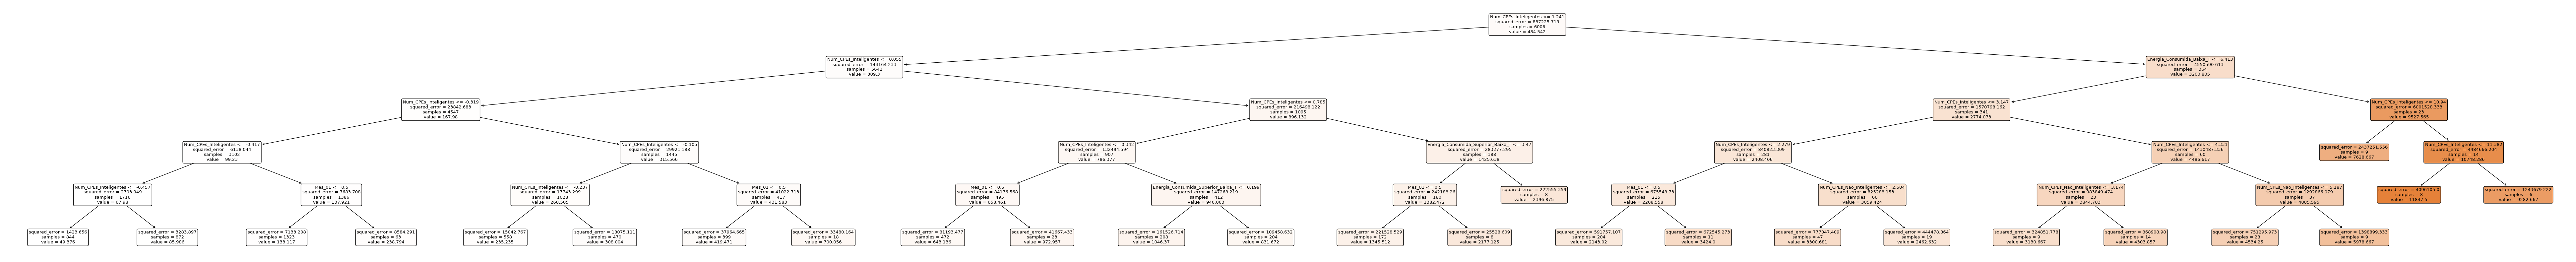

In [ ]:
#Visualizar arvores de decisão:

plt.figure(figsize=(100,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()
